### Code scritpie: **In hoeverre draagt het gedrag van Bitcoin whales bij aan het verbeteren van prijsvoorspellingen?**

BTC prijs historie dataset inladen
Bron ( )

In [1]:
#import sys
#!{sys.executable} -m pip install kagglehub


# Installeren en Importen 

In [5]:
import numpy as np
import pandas as pd
import os


In [ ]:
# import kagglehub

# #Download latest version
# path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")

# print("Path to dataset files:", path)

c:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 90.2M/90.2M [00:08<00:00, 10.9MB/s]

Extracting files...


Path to dataset files: C:\Users\boris\.cache\kagglehub\datasets\mczielinski\bitcoin-historical-data\versions\160


# Data verkenning

In [9]:
import pandas as pd

# Vervang 'bestandsnaam.csv' met de juiste naam van het bestand in je dataset
csv_file = os.path.join(path, "btcusd_1-min_data.csv")  # Zoek eerst de juiste bestandsnaam
df = pd.read_csv(csv_file)

# Bekijk de eerste paar rijen van de dataset
df.head()


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775281 entries, 0 to 6775280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 310.1 MB


In [11]:
# Bekijk de unieke waarden in de Volume-kolom
unique_values = df["Volume"].unique()

print("Unieke waarden in de Volume-kolom:", unique_values)

Unieke waarden in de Volume-kolom: [ 0.         10.         10.1        ...  0.17704815  0.07598197
  0.07470067]


In [12]:
# Eerste timestamp
eerste_timestamp = df["Timestamp"].min()

# Laatste timestamp
laatste_timestamp = df["Timestamp"].max()

print("Eerste timestamp:", eerste_timestamp)
print("Laatste timestamp:", laatste_timestamp)


Eerste timestamp: 1325412060.0
Laatste timestamp: 1740787200.0


In [13]:
import pandas as pd

# Timestamps omzetten naar een leesbaar formaat
eerste_datum = pd.to_datetime(1325412060, unit="s")
laatste_datum = pd.to_datetime(1740614400, unit="s")

print("Eerste datum:", eerste_datum)
print("Laatste datum:", laatste_datum)


Eerste datum: 2012-01-01 10:01:00
Laatste datum: 2025-02-27 00:00:00


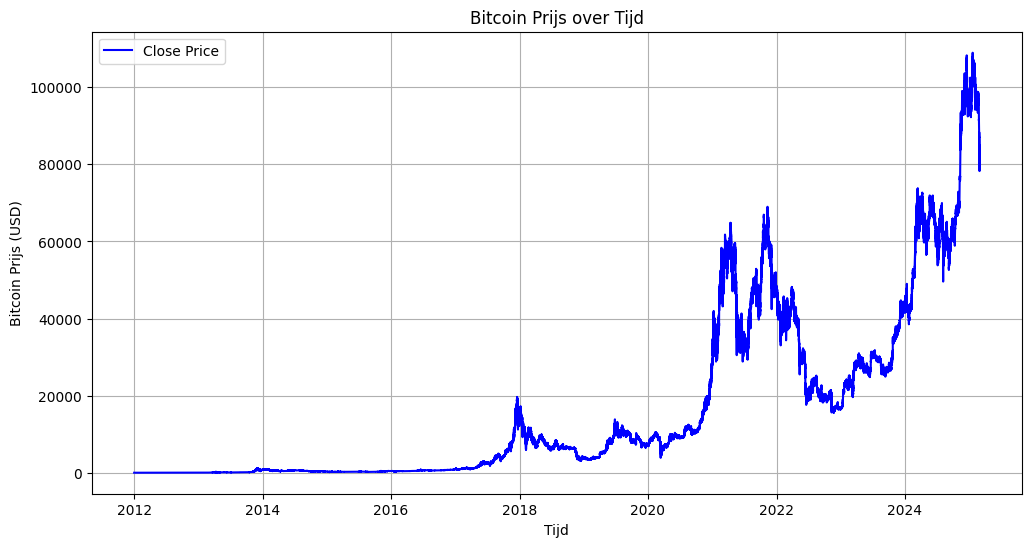

In [14]:
import matplotlib.pyplot as plt

# Zorg ervoor dat je Timestamp omgezet is naar een leesbare datum
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")

# Plot de Closing Price over tijd
plt.figure(figsize=(12,6))
plt.plot(df["Timestamp"], df["Close"], label="Close Price", color="blue")

# Grafiek instellingen
plt.xlabel("Tijd")
plt.ylabel("Bitcoin Prijs (USD)")
plt.title("Bitcoin Prijs over Tijd")
plt.legend()
plt.grid(True)

# Weergeven
plt.show()


In [26]:
df.shape

(6775281, 6)

# Inladen UTXO data:

               x   utxo_count                date
0  1232208241000   785.500000 2009-01-17 16:04:01
1  1232712619000  1329.250000 2009-01-23 12:10:19
2  1233027026000  1882.361111 2009-01-27 03:30:26
3  1233458169000  2427.555556 2009-02-01 03:16:09
4  1233855810000  3006.500000 2009-02-05 17:43:30


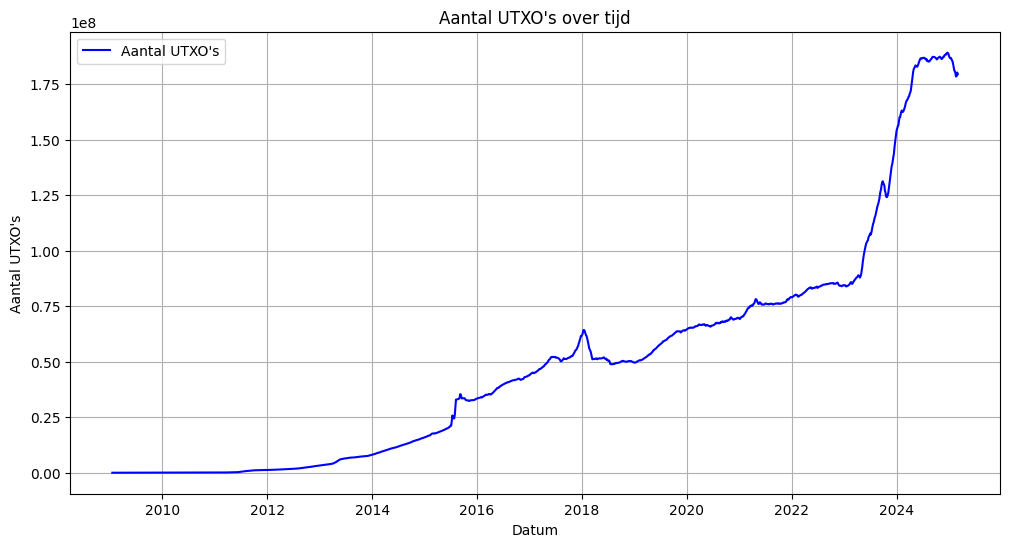

✅ Data succesvol opgeslagen in 'utxo_data.csv'


In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 📌 Stap 1: JSON-bestand inlezen (vervang dit met jouw bestandslocatie)
json_file = r"C:\Users\boris\Downloads\utxo-count (2).json"

try:
    with open(json_file, "r") as file:
        data = json.load(file)
except FileNotFoundError:
    print(f"❌ Bestand '{json_file}' niet gevonden. Controleer of het correct is opgeslagen.")
    exit()
except json.JSONDecodeError:
    print(f"❌ JSON-bestand '{json_file}' is niet correct geformatteerd.")
    exit()

# 📌 Stap 2: Controleer of "utxo-count" in de JSON-structuur zit
if "utxo-count" not in data:
    print("❌ De JSON bevat geen sleutel 'utxo-count'. Controleer de structuur van het bestand.")
    exit()

# 📌 Stap 3: Data omzetten naar een Pandas DataFrame
df_utxo = pd.DataFrame(data["utxo-count"])  # Let op de correcte sleutel!

# 📌 Stap 4: UNIX tijdstempels (milliseconden) omzetten naar een leesbare datum
df_utxo["date"] = pd.to_datetime(df_utxo["x"], unit="ms")  # "x" bevat de UNIX-tijdstempel
df_utxo = df_utxo.rename(columns={"y": "utxo_count"})  # "y" bevat het aantal UTXO's

# 📌 Stap 5: Data weergeven en controleren
print(df_utxo.head())  # Laat de eerste paar rijen zien

# 📌 Stap 6: Data visualiseren in een grafiek
plt.figure(figsize=(12, 6))
plt.plot(df_utxo["date"], df_utxo["utxo_count"], label="Aantal UTXO's", color="blue")
plt.xlabel("Datum")
plt.ylabel("Aantal UTXO's")
plt.title("Aantal UTXO's over tijd")
plt.legend()
plt.grid()
plt.show()

# 📌 Stap 7: Data exporteren naar een CSV-bestand als je het later wilt bekijken
df_utxo.to_csv("utxo_data.csv", index=False)
print("✅ Data succesvol opgeslagen in 'utxo_data.csv'")


In [4]:
df_utxo


,x,utxo_count,date
0,1232208241000,7.855000e+02,2009-01-17 16:04:01
1,1232712619000,1.329250e+03,2009-01-23 12:10:19
2,1233027026000,1.882361e+03,2009-01-27 03:30:26
3,1233458169000,2.427556e+03,2009-02-01 03:16:09
4,1233855810000,3.006500e+03,2009-02-05 17:43:30
...,...,...,...
1497,1739435983000,1.801065e+08,2025-02-13 08:39:43
1498,1739762966000,1.784993e+08,2025-02-17 03:29:26
1499,1740134092000,1.786929e+08,2025-02-21 10:34:52
1500,1740506877000,1.803113e+08,2025-02-25 18:07:57


# Inladen Memepool data

               x  mempool_tx_count                date
0  1466001900000      17325.729167 2016-06-15 14:45:00
1  1466185500000      10574.645833 2016-06-17 17:45:00
2  1466369100000       2768.901042 2016-06-19 20:45:00
3  1466552700000       4250.802083 2016-06-21 23:45:00
4  1466736300000       5839.572917 2016-06-24 02:45:00


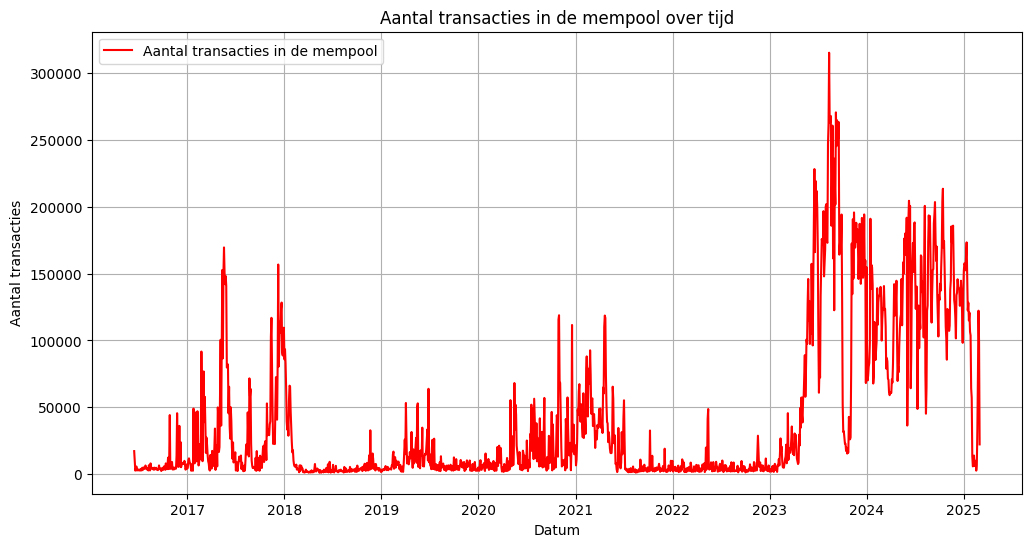

✅ Data succesvol opgeslagen in 'mempool_data.csv'


In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 📌 Stap 1: JSON-bestand inlezen (vervang met je echte pad)
json_file = r"C:\Users\boris\Downloads\mempool-count.json"

try:
    with open(json_file, "r") as file:
        data = json.load(file)
except FileNotFoundError:
    print(f"❌ Bestand '{json_file}' niet gevonden. Controleer of het correct is opgeslagen.")
    exit()
except json.JSONDecodeError:
    print(f"❌ JSON-bestand '{json_file}' is niet correct geformatteerd.")
    exit()

# 📌 Stap 2: Controleer of "mempool-count" in de JSON-structuur zit
if "mempool-count" not in data:
    print("❌ De JSON bevat geen sleutel 'mempool-count'. Controleer de structuur van het bestand.")
    exit()

# 📌 Stap 3: Data omzetten naar een Pandas DataFrame
df_mempool = pd.DataFrame(data["mempool-count"])  # Gebruik de juiste sleutel

# 📌 Stap 4: UNIX tijdstempels (milliseconden) omzetten naar een leesbare datum
df_mempool["date"] = pd.to_datetime(df_mempool["x"], unit="ms")  # "x" bevat de UNIX-tijdstempel
df_mempool = df_mempool.rename(columns={"y": "mempool_tx_count"})  # "y" bevat het aantal transacties in de mempool

# 📌 Stap 5: Data weergeven en controleren
print(df_mempool.head())  # Laat de eerste paar rijen zien

# 📌 Stap 6: Data visualiseren in een grafiek
plt.figure(figsize=(12, 6))
plt.plot(df_mempool["date"], df_mempool["mempool_tx_count"], label="Aantal transacties in de mempool", color="red")
plt.xlabel("Datum")
plt.ylabel("Aantal transacties")
plt.title("Aantal transacties in de mempool over tijd")
plt.legend()
plt.grid()
plt.show()

# 📌 Stap 7: Data exporteren naar een CSV-bestand als je het later wilt bekijken
df_mempool.to_csv("mempool_data.csv", index=False)
print("✅ Data succesvol opgeslagen in 'mempool_data.csv'")
